In [ ]:
import scipy.io
from scipy.spatial.distance import euclidean
from PIL import Image
import  matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.image as img
from sklearn.cluster import KMeans
# import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_gt='drive/MyDrive/assignment2_pattern/BSR/BSDS500/data/groundTruth/test'#/2092.mat'
path_images='drive/MyDrive/assignment2_pattern/BSR/BSDS500/data/images/test'#train/2092.jpg'
path_saving='drive/MyDrive/assignment2_pattern/BSR/BSDS500/data/images'

##Loading Images and Ground Truth Segmentations

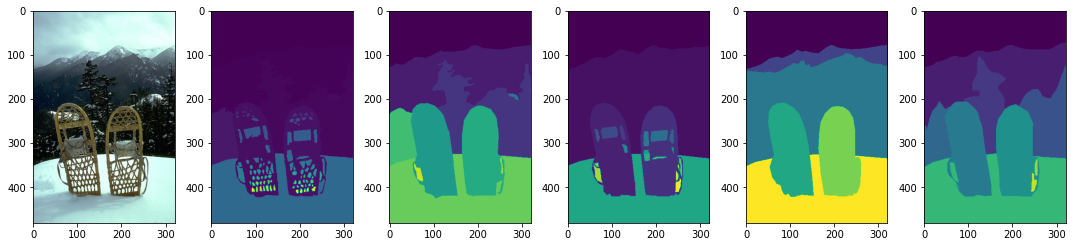

In [ ]:
# mat = scipy.io.loadmat(path_gt)
# image=np.array(mat['groundTruth'])
# print((mat['groundTruth']))
# images = scipy.io.loadmat(path,variable_names='IMAGES',appendmat=False)#.get('IMAGES')
# images=np.uint8(images)
# imgplot = plt.imshow(images[:,:,0])
# img=Image.open(path_images)
# plt.imshow(img)
# plt.imshow(image[0][0])

og_images=[]
groundTruth=[]

##load original images
images = [og_image[:-4] for og_image in os.listdir(path_images) if os.path.isfile(os.path.join(path_images,og_image)) and og_image.endswith('jpg') ]
images.sort(key=int)
for og_image in images:
  og_image = og_image+'.jpg'
  og_images.append(img.imread(os.path.join(path_images, og_image))) 
# plt.imshow(og_images[0])
# plt.imshow(og_images[1])
# for og_image in os.listdir(path_images):
#   # print(og_image)
#   image=Image.open(os.path.join(path_images,og_image))
#   print(os.path.join(path_images,og_image))
#   og_images.append(image)
# og_images.sort(key=int) 
# for i in range(5):
#    plt.imshow(og_images[i])
# print(len(og_images))   

##load groundTruth segmentations
# for gt_image in os.listdir(path_gt):
gt_images = [gt_image[:-4] for gt_image in os.listdir(path_gt) if os.path.isfile(os.path.join(path_gt,gt_image))]# and og_image.endswith('jpg') ]
gt_images.sort(key=int)

for gt_image in gt_images:
  gt_image = gt_image+'.mat'
  gt=scipy.io.loadmat(os.path.join(path_gt,gt_image))
  gt_arr=[]
  for i in np.squeeze(gt['groundTruth']).reshape(-1):
    gt_arr.append(i[0][0][0])
  groundTruth.append(gt_arr)
# plt.imshow(groundTruth[0][0])

fig, ax = plt.subplots(1, 6, figsize=(15,15))

# for i in range(50):
ax[0].imshow(og_images[0])
# print('hi')
for j in range(5):
  # print('hi2')
  ax[j+1].imshow(groundTruth[0][j])
fig.tight_layout()  
plt.show()
# plt.imshow(groundTruth[199][3])

# img2=np.array(mat,dtype='uint8')
# f = h5py.File(path_gt,'r')
# data = f.get('data/variable1')
# data = np.array(data)
# plt.imshow(data)
# img=np.uint8(path)
# plt.imshow(path,[])



In [ ]:
def Color_Images(labels,image,k):
    colored_mat= np.zeros(image.shape,dtype=np.uint8)
    colors = []
    for i in range(k):
        colors.append(np.array([np.random.randint(0, 255),np.random.randint(0, 255),np.random.randint(0, 255)]))
    for i in range(image.shape[0]):
        colored_mat[i] = colors[labels[i]]
    return colored_mat

In [ ]:
from sklearn.neighbors import kneighbors_graph 
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors as nn
def Normalized_Cut(image):
  A = kneighbors_graph(image , 5 , mode='connectivity', include_self=False).toarray()
  D = np.diag(np.sum(A, axis=1))
  L = D - A
  eigen_values, eigen_vectors = np.linalg.eig(np.dot(np.linalg.inv(D),L))
  index = eigen_values.argsort() 
  eigen_values = eigen_values[index]
  eigen_vectors = eigen_vectors[:,index]

       
  U = eigen_vectors[:,1:6]
  U = np.real(np.array(U))

  norm = np.linalg.norm(U, axis=1)
  for i in range(len(norm)):
    if norm[i]==0:
       norm[i]=0.00001
  Y=U/norm[:,np.newaxis]
  kMeans_model = KMeans(5).fit(Y)
  return  kMeans_model.labels_

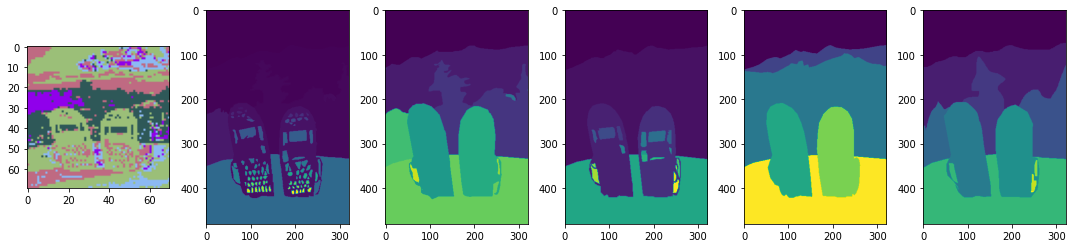

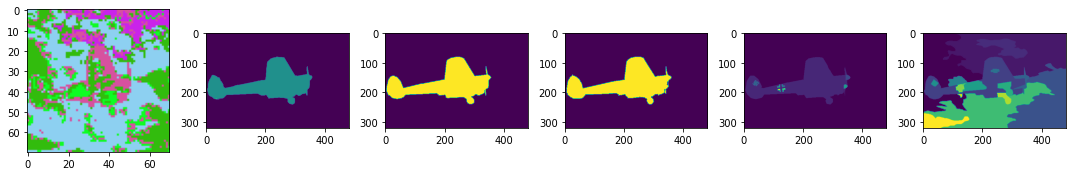

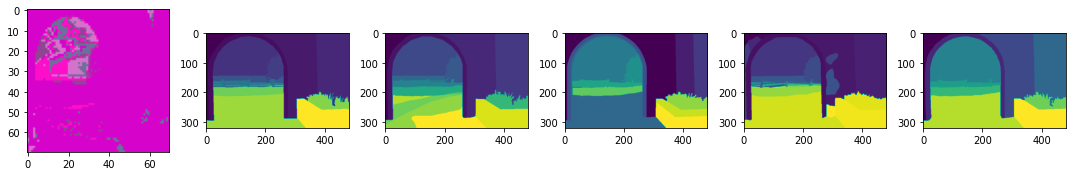

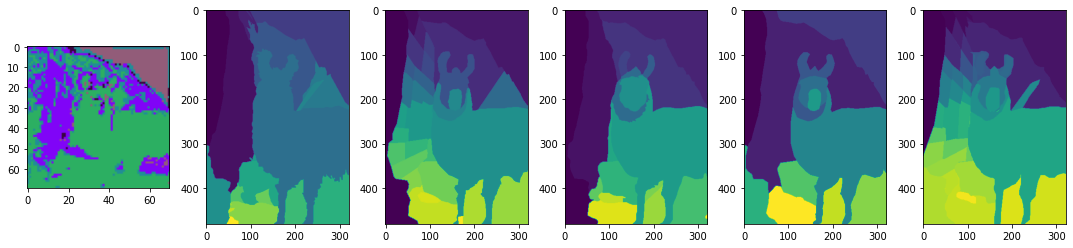

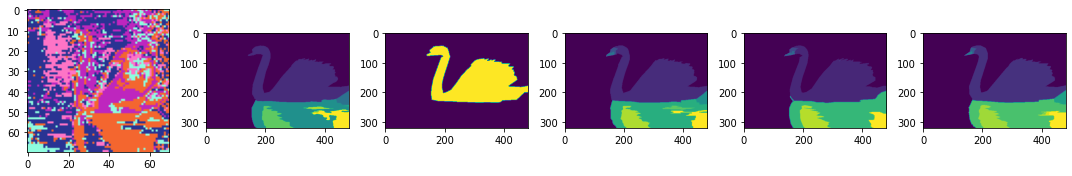

'\nNCut_c = []\nNCut_c.append(cluster_NCut)\nfor i in range(1, selected_images.shape[0]):\n  dist_matrix = dist_mat(selected_images[i])\n  cluster_NCut = NormalizedCut(dist_matrix)\n  NCut_c.append(cluster_NCut)\n'

In [ ]:
import cv2
for i in range(5):
  rszd_img = cv2.resize(og_images[i], (70,70),interpolation=cv2.INTER_AREA).reshape(-1,3)
  cluster_NCut = Normalized_Cut(np.array(rszd_img))
  segmented_image = Color_Images(cluster_NCut,rszd_img, 5)
  fig, ax = plt.subplots(1, 6, figsize=(15,15))
  # for i in range(50):
  ax[0].imshow(segmented_image.reshape(70,70,3))
  for j in range(5):
    ax[j+1].imshow(groundTruth[i][j])
  fig.tight_layout()  
  plt.show()  


In [ ]:
import copy
class K_Means:
    def __init__(self, k, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        centroids_pos=np.random.randint(0,data.shape[0],self.k)
        centroids=[data[centroids_pos[i]] for i in range(len(centroids_pos))]
        

        for iter in range(self.max_iter):
            classifications = []
            labels=[]
            for i in range(self.k):
                classifications.append([])

            for pixel in data:
                distances = [np.linalg.norm(pixel-centroids[j]) for j in range(len(centroids))]
                classification = distances.index(min(distances))
                labels.append(classification)

                classifications[classification].append(pixel)

            prev_centroids = copy.deepcopy(centroids)

            for c in range(self.k):
                centroids[c]=np.mean(classifications[c]) 

            change=0
            for i in range(self.k):
                change += np.linalg.norm(prev_centroids[i]-centroids[i]) 

            if change <= self.tol:
              break

        return labels

In [ ]:
res = []
for i in range(5):
  row, col, d = og_images[i].shape
  x = []
  y = []
  for j in range(row):
    for k in range(col):
      x.append(j)
      y.append(k)
  x = np.array(x).reshape(og_images[i].shape[0]*og_images[i].shape[1], 1)
  y = np.array(y).reshape(og_images[i].shape[0]*og_images[i].shape[1], 1)  
  mat = og_images[i].reshape(og_images[i].shape[0]*og_images[i].shape[1], 3)
  image = np.append(mat, x, axis=1)
  image = np.append(image,y, axis =1)
  image = image.reshape(og_images[i].shape[0], og_images[i].shape[1], 5)
  res.append(image)
res = np.array(res)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [ ]:
kmeans_images = []
Kmeans_5path = 'drive/MyDrive/assignment2_pattern/BSR/BSDS500/data/images/saved'
saved =  [kmeans_image[:-4] for kmeans_image in os.listdir(Kmeans_5path) if os.path.isfile(os.path.join(Kmeans_5path,kmeans_image))]
saved.sort(key=int)
for kmeans_image in saved:
  kmeans_image = kmeans_image+'.jpg'
  kmeans_images.append(img.imread(os.path.join(Kmeans_5path, kmeans_image)))

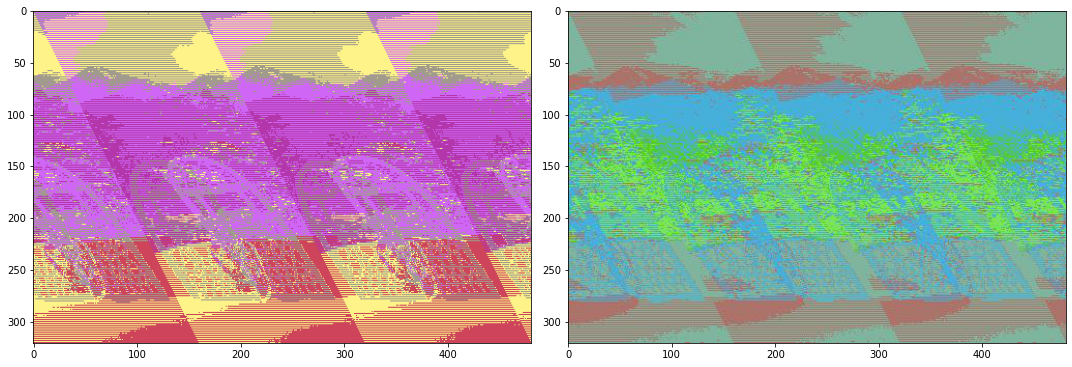

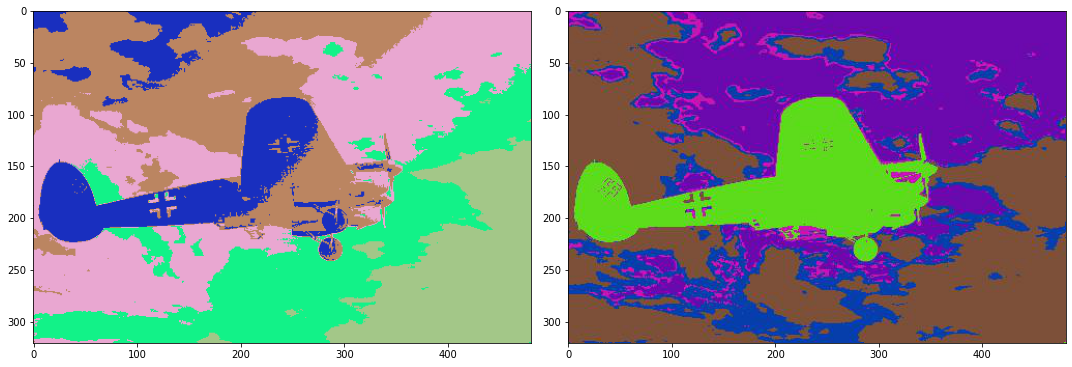

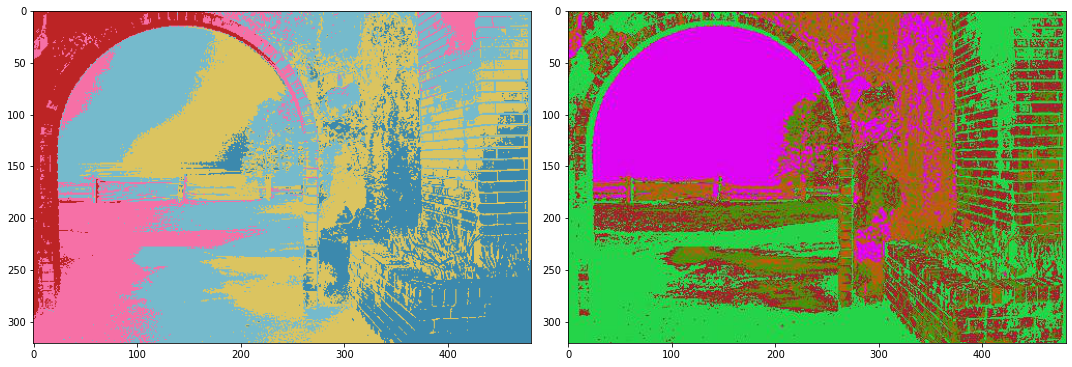

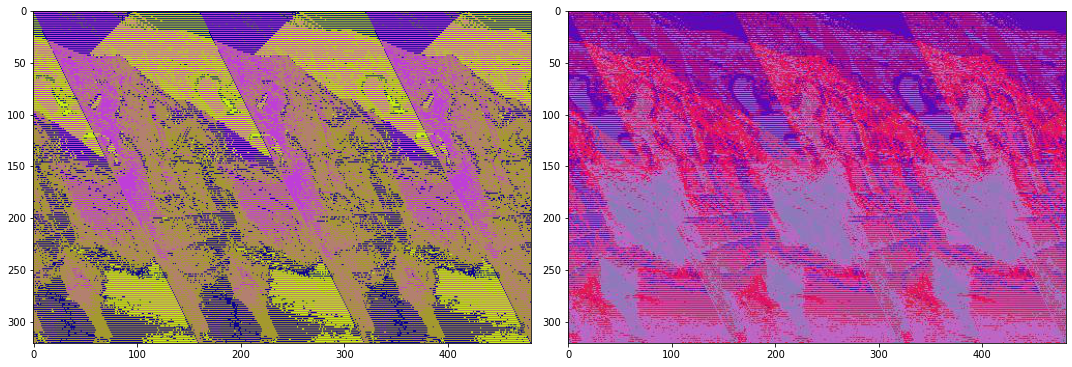

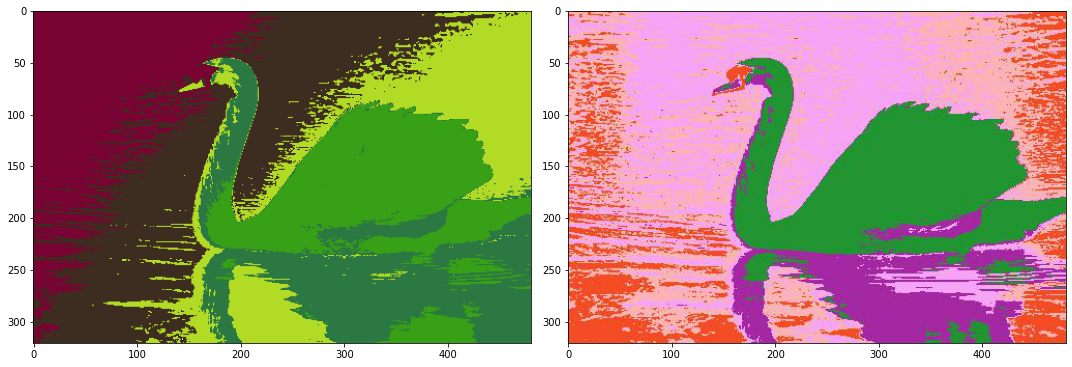

In [ ]:
import cv2
for index in range(5):
  res[index] = res[index].reshape(-1, 5)
  og_images[index] = og_images[index].reshape(-1,3)
  model = K_Means(5).fit(res[index])

  seg_image = Color_Images(model ,og_images[index], 5)
  fig, ax = plt.subplots(1, 2, figsize=(15,15))
  ax[0].imshow(seg_image.reshape(321,481,3))
  ax[1].imshow(kmeans_images[index].reshape(321,481,3))
  fig.tight_layout()  
  plt.show() 